In [10]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import scipy.stats

In [11]:
# Iris data
iris = load_iris()  # load data
X = iris.data[:, 3:]  # data
y = iris.target  # target
class_names = iris.target_names  # Iris class names

mask = np.isin(iris.target, [0, 1])
X = X[mask]
y = y[mask]
class_names = class_names[0:2]

print(f'\nclass names: \n{class_names}')
print(f'\nfeature names: \n{iris.feature_names[3:]}')


class names: 
['setosa' 'versicolor']

feature names: 
['petal width (cm)']


In [12]:
# configs
output_dir = 'plots'  # output directory
os.makedirs(output_dir, exist_ok=True)

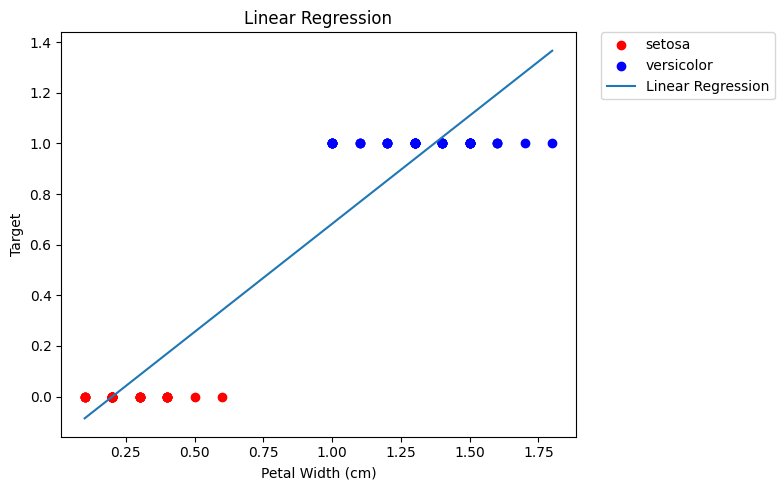

In [13]:
# linear regression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
x_test = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
y_lin_pred = lin_reg.predict(x_test)

plt.figure(figsize=(8, 5))
plt.scatter(X[y == 0], y[y == 0], color='red', label=class_names[0])
plt.scatter(X[y == 1], y[y == 1], color='blue', label=class_names[1])
plt.plot(x_test, y_lin_pred, label='Linear Regression')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Target')
plt.title('Linear Regression')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0), borderaxespad=0)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'linear.webp'))
plt.show()
plt.close()

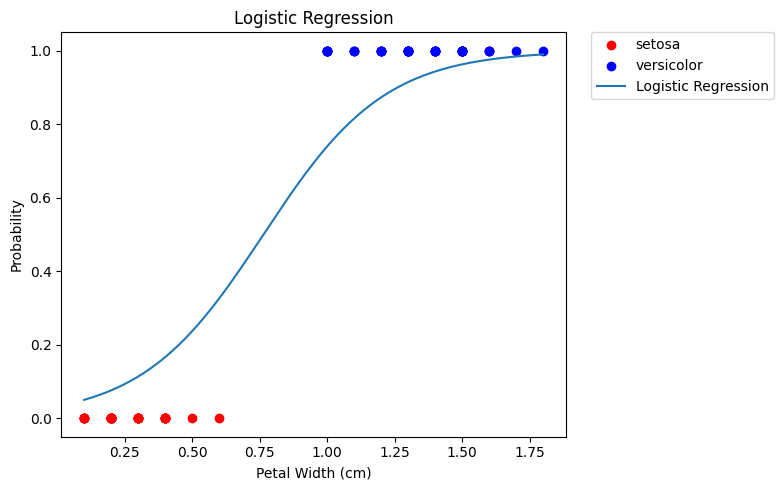

In [14]:
# logistic regression
log_reg = LogisticRegression()
log_reg.fit(X, y)
y_log_prob = log_reg.predict_proba(x_test)[:, 1]

plt.figure(figsize=(8, 5))
plt.scatter(X[y == 0], y[y == 0], color='red', label=class_names[0])
plt.scatter(X[y == 1], y[y == 1], color='blue', label=class_names[1])
plt.plot(x_test, y_log_prob, label='Logistic Regression')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Probability')
plt.title('Logistic Regression')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0), borderaxespad=0)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'logistic.webp'))
plt.show()
plt.close()

In [15]:
# logistic regression coefficients
coef = log_reg.coef_[0][0]
intercept = log_reg.intercept_[0]
print(f'\nCoefficients:\nintercept = {intercept:.4f}\ncoef = {coef:.4f}')


Coefficients:
intercept = -3.3799
coef = 4.4240


In [ ]:
# logistic regression summary
X_design = np.hstack([np.ones((X.shape[0], 1)), X])
p = log_reg.predict_proba(X)[:, 1]
W = np.diag(p * (1 - p))
Fisher_inv = np.linalg.inv(X_design.T @ W @ X_design)
se = np.sqrt(np.diag(Fisher_inv))

z = np.array([intercept, coef]) / se
p_values = 2 * (1 - scipy.stats.norm.cdf(np.abs(z)))
ci_95 = np.array([
    [intercept, coef] - 1.96 * se,
    [intercept, coef] + 1.96 * se
]).T

print("\nSummary of Logistic Regression Coefficients:")
for i, name in enumerate(['intercept', 'petal width']):
    print(f"{name:12s}: coef = {intercept if i==0 else coef:.4f} | SE = {se[i]:.4f} | p = {p_values[i]} | 95% CI = [{ci_95[i,0]:.4f}, {ci_95[i,1]:.4f}]")



Summary of Logistic Regression Coefficients:
intercept   : coef = -3.3799 | SE = 0.6242 | p = 6.140579889013509e-08 | 95% CI = [-4.6034, -2.1565]
petal width : coef = 4.4240 | SE = 0.7091 | p = 4.40006697743911e-10 | 95% CI = [3.0342, 5.8138]


In [17]:
# confusion matrix and accuracy
y_log_pred = log_reg.predict(X)
cm = confusion_matrix(y, y_log_pred)
acc = accuracy_score(y, y_log_pred)
print(f'\nConfusion Matrix:\n{cm}')
print(f'\nAccuracy: {acc}')


Confusion Matrix:
[[50  0]
 [ 0 50]]

Accuracy: 1.0


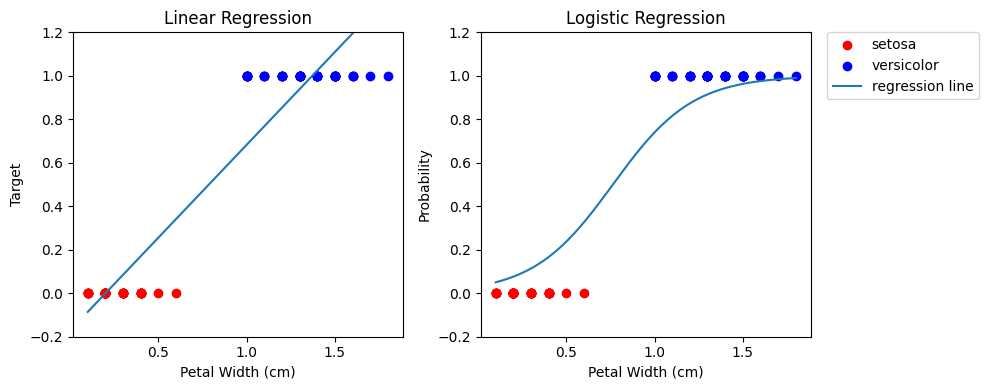

In [18]:
# combined
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# linear regression plot
axes[0].set_ylim(-0.2, 1.2)
axes[0].scatter(X[y == 0], y[y == 0], color='red', label=class_names[0])
axes[0].scatter(X[y == 1], y[y == 1], color='blue', label=class_names[1])
axes[0].plot(x_test, y_lin_pred)
axes[0].set_xlabel('Petal Width (cm)')
axes[0].set_ylabel('Target')
axes[0].set_title('Linear Regression')

# logistic regression plot
axes[1].set_ylim(-0.2, 1.2)
axes[1].scatter(X[y == 0], y[y == 0], color='red', label=class_names[0])
axes[1].scatter(X[y == 1], y[y == 1], color='blue', label=class_names[1])
axes[1].plot(x_test, y_log_prob, label='regression line')
axes[1].set_xlabel('Petal Width (cm)')
axes[1].set_ylabel('Probability')
axes[1].set_title('Logistic Regression')

# output
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0), borderaxespad=0)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'linear_logistic.webp'))
plt.show()
plt.close()